# Cellular Susceptible-Infectious-Recovered (SIR) Model

*This notebook demonstrates how CellLab-CTS can be used to create a stochastic, cellular implementation of the Susceptible-Infectious-Recovered (SIR) epidemiological model. For the original example, see Tucker et al. (2016, Geoscientific Model Development).*

## Model Framework

The model domain consists of a hexagonal lattice of cells, representing individuals in a community. Each cell takes one of three possible states:

- **Susceptible:** the individual is susceptible to an infectious disease

- **Infectious:** the individual is infected, and able to transmit the disease to their immediate neighbors

- **Recovered:** the individual has recovered and is immune to further infection

As with all CellLab-CTS models, the dynamics are described by pairwise transition rules. In this case, there are just two transition rules:

(1) When an infectious cell is adjacent to a susceptible cell, the susceptible cell has a probability $P_i$ per unit time of becoming *infected*. This transition is represented by drawing the waiting time before infection occurs as a random number from an exponential distribution with a mean time-to-infection of $T_i = 1/P_i$. If the infectious cell recovers before then, infection does not take place.

(2) An infectious cell, regardless of its neighbor states, has a probability $P_r$ per unit time of *recovery*. This translates into an expected waiting time to recovery of $T_r = 1/P_r$, and it is implemented by drawing a time-to-recovery from an exponential distribution with mean $T_r$. Note that because of the lattice geometry, the actual expected recovery rate is $6/T_r$, and the expected recovery time is $T_r/6$.

In the implementation below, the recovery time is set to unity, such that the infection rate is normalized by the recovery rate.

## Implementation

The model is implemented as a Python class, in the accompanying file `sir.py`. Here we import the class, create an instance with default parameters, and run it. The starting condition just has a single infected cell.


In [1]:
from sir import StochasticCellularSIRmodel

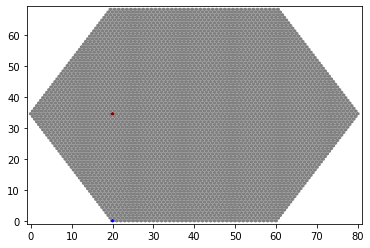

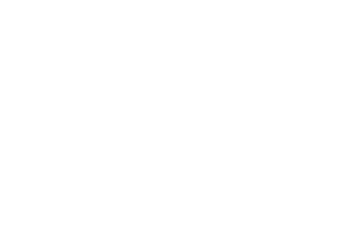

In [2]:
sir = StochasticCellularSIRmodel()

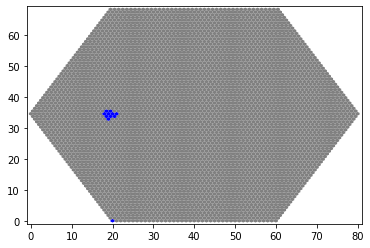

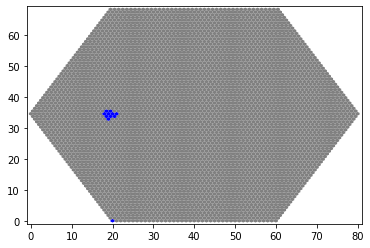

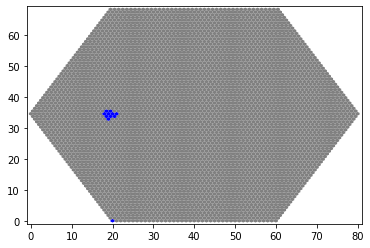

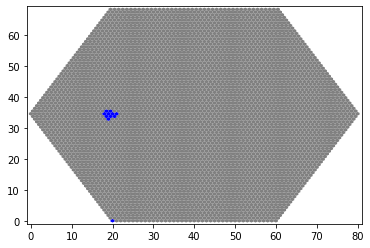

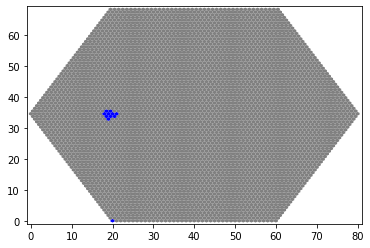

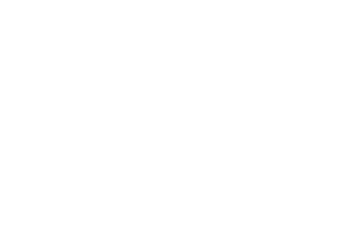

In [3]:
sir.run()

## Changing the infection and recovery rates

In the default run above, $T_i / T_r = 2$, meaning that the infection rate is relatively modest, and the infection burns itself out. What happens if we double it?

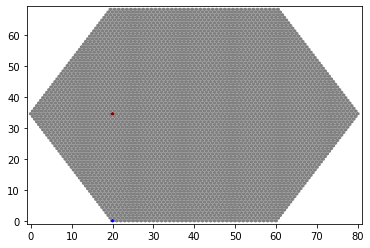

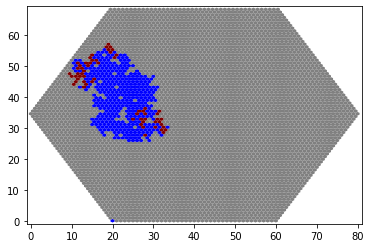

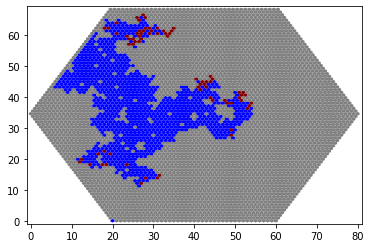

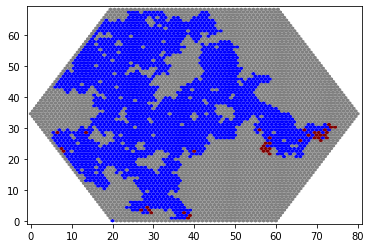

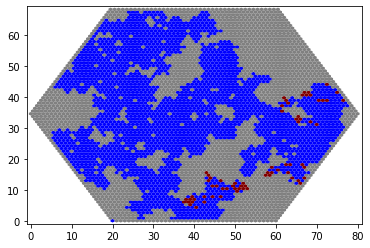

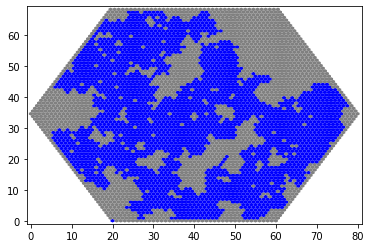

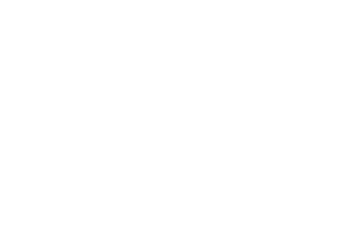

In [6]:
sir = StochasticCellularSIRmodel(infection_rate=4.0, run_duration=10.0,
                                 output_interval=2.0)
sir.run()

Now the infection is much more aggressive. We can query the proportion of infected and recovered cells as follows:

In [14]:
import numpy as np

# Total number of recovered cells (not counting the one boundary cell
# that was set to recovered simply for plotting purposes)
num_recovered_cells = np.count_nonzero(sir.ca.node_state == 2) - 1

# Percentage
percent_infected_and_recovered = 100.0 * (num_recovered_cells
                                          / len(sir.grid.core_nodes))

print(str(int(np.round(percent_infected_and_recovered))) + '% infected')

62% infected


What if we double the infection/recovery rate ratio yet again?

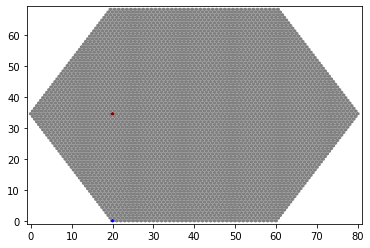

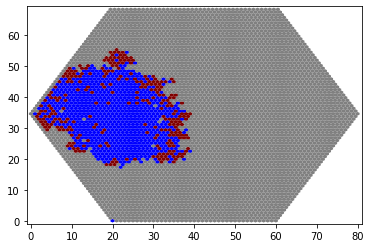

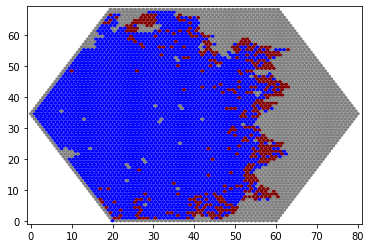

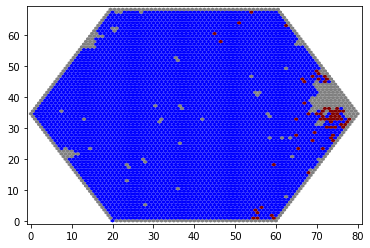

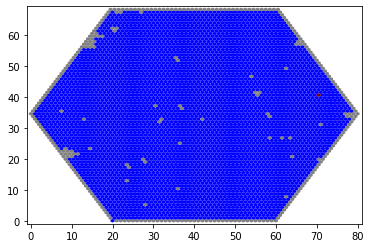

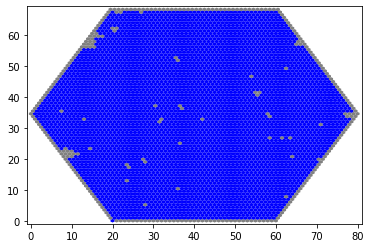

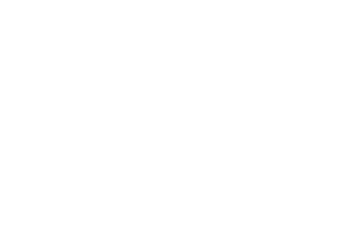

In [17]:
sir = StochasticCellularSIRmodel(infection_rate=8.0, run_duration=5.0,
                                 output_interval=1.0)
sir.run()

Here the spread is faster, and...

In [18]:
num_recovered_cells = np.count_nonzero(sir.ca.node_state == 2) - 1
percent_infected_and_recovered = 100.0 * (num_recovered_cells
                                          / len(sir.grid.core_nodes))
print(str(int(np.round(percent_infected_and_recovered))) + '% infected')

99% infected


...nearly everyone gets infected.

MORAL: stay inside and play with Landlab!